Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2613 - Inteligencia Artificial
<br>

<center>
    <h2> Ayudantía 9 </h2>
    <h1> Gradient Boosting y SVM: Support-vector machine </h1>
    <p>
        Carlos Figueredo: cafigueredo@uc.cl  <br> 
        Ignacio Villanueva: ignacio.villanueva@uc.cl<br>
        2023 - 1    
    </p>
    <br>
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS4Q0afTZjM9co_5SlbGEcYk7IZ4__gvs9R0w&usqp=CAU" width="250"/>
    <img src="https://miro.medium.com/max/1200/1*FGzasG-84SHk_XXSClcoqA.png" width="250"/>
    
</center>

<br>

---

## Gradient Boosting

Ahora veremos una implementación básica de *Gradient Boosting Regression*.

Recordemos que el algoritmo consta de una etapa iterativa donde se entrenan árboles de decisión en los pseudo-residuos del árbol de la iteración anterior. El siguiente pseudo-código lo muestra:

Input: Datos de entrenamiento $\{(x_i, y_i)\}_{i=1}^n$, y una función de perdida *loss function* diferenciable $L(y, F(x))$ y un número de iteraciones M.

1. Iniciar el modelo con un valor constante:
$F_1(x) = \arg\min_\gamma \sum_{i=1}^n L(y_i, \gamma)$

2. For $m = 1,...,M$ 
  - Calcular pseudo-residuos: 
  $\quad r_{im} = -[\frac{∂L(y_i, F(x_i))}{\partial F(x_i)}]_{F(x)=F_{m-1}(x)} \quad ∀i\in \{1,...,n\}$

  - Ajustar el modelo débil (árbol) usando como datos de entrenamiento $\{(x_i,r_{im})\}_{i=1}^n$

  - Resolver el problema unidimensional:
  $\gamma_m = \arg\min_\gamma \sum_{i=1}^n L(y_i, F_{m-1}(x_i)+\gamma h_m(x_i))$

  - Actualizar el modelo: $F_m(x) = F_{m-1}(x) + \gamma_m h_m(x)$

3. Output $F_M(x)$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

En primer lugar, simulamos datos provenientes de regresión. Escogemos una variable regresora y una variable objetivo.

Text(0, 0.5, 'Variable objetivo y')

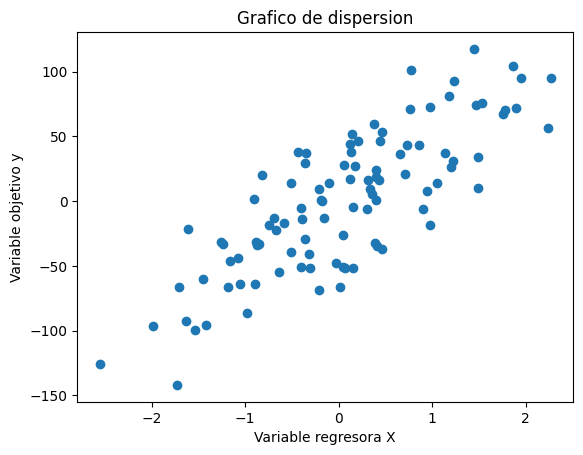

In [ ]:
X, y = make_regression(random_state=0, n_features=1, noise=30)
plt.scatter(X, y)
plt.title('Grafico de dispersion')
plt.xlabel('Variable regresora X')
plt.ylabel('Variable objetivo y')

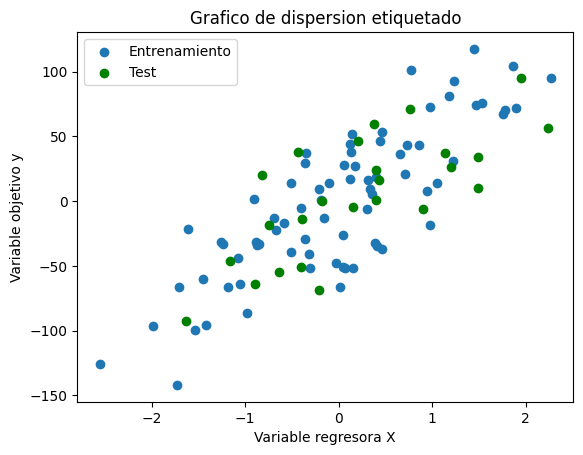

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, c='green')
plt.title('Grafico de dispersion')
plt.xlabel('Variable regresora X')
plt.ylabel('Variable objetivo y')
plt.legend(('Entrenamiento', 'Test'))
plt.show()

Por defecto, la función de perdida es la de error cuadrático, por lo que el problema se transforma en minimización de cuadrados. Además, en cada modelo débil se utilizan arboles de regresión, es posible ajustar los parametros de los arboles de regresión. Más info en [GradienBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html).

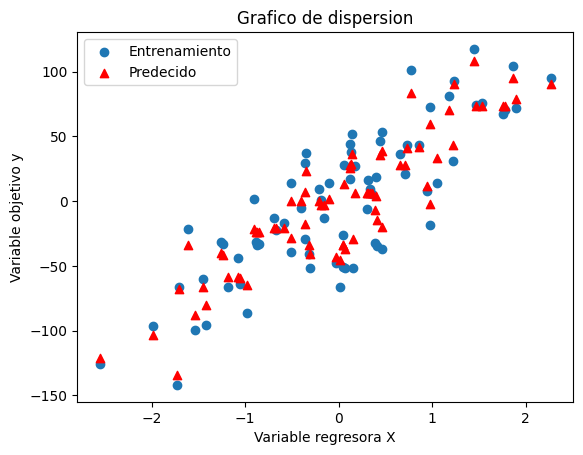

In [ ]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

plt.scatter(X_train, y_train)
plt.scatter(X_train, reg.predict(X_train), marker='^', c='red')
plt.title('Grafico de dispersion')
plt.xlabel('Variable regresora X')
plt.ylabel('Variable objetivo y')
plt.legend(('Entrenamiento', 'Predecido'))
plt.show()


¿Qué sucede si escogemos sólo un arbol en las etapas iterativas? ¿A qué se parece el valor mostrado?

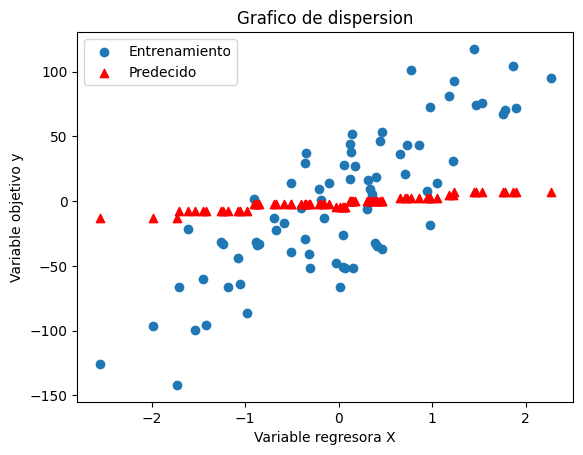

In [ ]:
reg1 = GradientBoostingRegressor(random_state=0, n_estimators=1)
reg1.fit(X_train, y_train)

plt.scatter(X_train, y_train)
plt.scatter(X_train, reg1.predict(X_train), marker='^', c='red')
plt.title('Grafico de dispersion')
plt.xlabel('Variable regresora X')
plt.ylabel('Variable objetivo y')
plt.legend(('Entrenamiento', 'Predecido'))
plt.show()

¿Qué sucede si escogemos 1000 arboles en las etapas iterativas? ¿Que ocurre con el *fitting*?

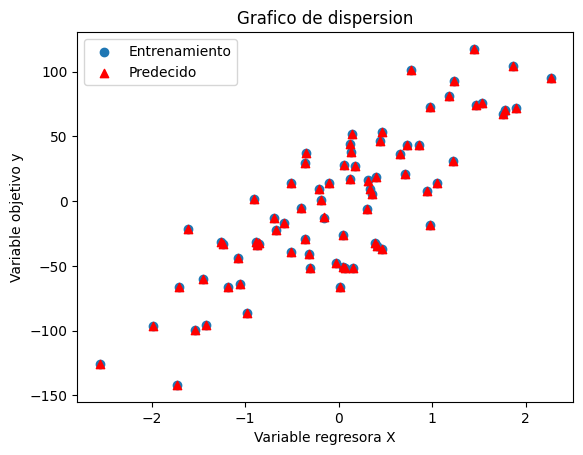

In [ ]:
reg1000 = GradientBoostingRegressor(random_state=0, n_estimators=1000)
reg1000.fit(X_train, y_train)

plt.scatter(X_train, y_train)
plt.scatter(X_train, reg1000.predict(X_train), marker='^', c='red')
plt.title('Grafico de dispersion')
plt.xlabel('Variable regresora X')
plt.ylabel('Variable objetivo y')
plt.legend(('Entrenamiento', 'Predecido'))
plt.show()

Finalmente, calculamos el score para cada una de las variantes.

In [ ]:
score = reg.score(X_test, y_test)
score1 = reg1.score(X_test, y_test)
score1000 = reg1000.score(X_test, y_test)

print(f'Modelo default(M=100) \t score = {score}\n Modelo M=1 \t\t score = {score1}\n Modelo M=1000 \t\t score = {score1000}')

Modelo default(M=100) 	 score = 0.34242066970821994
 Modelo M=1 		 score = 0.10653513157667471
 Modelo M=1000 		 score = 0.15528792276966208


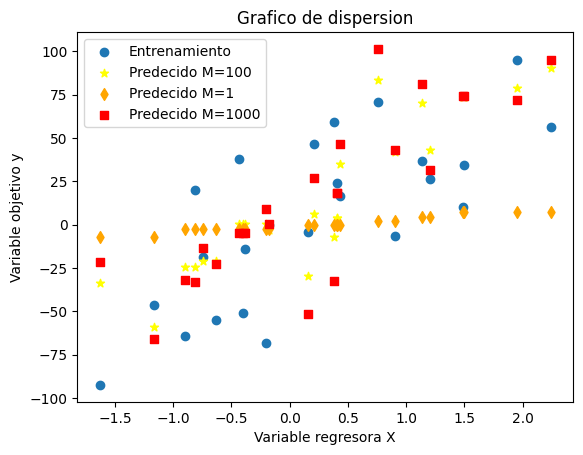

In [ ]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, reg.predict(X_test), marker='*', c='yellow')
plt.scatter(X_test, reg1.predict(X_test), marker='d', c='orange')
plt.scatter(X_test, reg1000.predict(X_test), marker='s', c='red')
plt.title('Grafico de dispersion')
plt.xlabel('Variable regresora X')
plt.ylabel('Variable objetivo y')
plt.legend(('Entrenamiento', 'Predecido M=100', 'Predecido M=1', 'Predecido M=1000'))
plt.show()

#SVM

##Implementación 
A continuación una implementación "a mano"

In [ ]:
!pip -q install celluloid
# Creamos el dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from celluloid import Camera
from IPython.core.display import Video
import celluloid


# Definimos una clase con la implementación de SVM binario
class BinaryClassifierSVM:
    
    # El modelo tiene por defecto el valor de los parametros del hiperplano y C.
    def __init__(self, C=1):
        self.C = C
        self.params = np.array([-1, 1, 1]).astype(float)
    
    # Esta función retornará cuán mal se ajusta nuestra hipótesis actual a los datos
    def funcion_costo(self, X, Y):
        norm = (self.params**2).sum()       # --> (||w||^2)        # 1. Norma de los parámetros (||B||) 
        dist = 1 - Y*np.dot(X,self.params)  # --> 1 - y*(x.w)      # 2. A cuánto estamos actualmente dentro del margen máximo para cada punto!
        dist = dist[dist>0]                 # Restriccion 
                                            # Sólo nos importa las distancias que son mayores a cero,
                                            # porque eso podría significar:
                                            # a) Esta bien clasificada, pero el margen es menor a 1 --> (0 < 1 - Y * <X,w> < 1).
                                            # b) Esta mal clasificado (Y*<x, w> < 0)
        return norm/2, self.C*dist.sum(), norm/2+self.C*dist.sum()
    
    # Esta función calcula el gradiente de nuestra función de costo con respecto a 
    # nuestros parámetros
    def calcular_gradiente(self, X, Y):
        """
        valid_sample es una matriz en donde las columnas indican si el valor es mayor a 0 (1 en la matriz) o no (0 en la matriz),
        de esta forma en la sumatoria solo se consideraran los samples validos (con 1's en la matriz)
        1er valid_sample: Toma las distancias mayores a cero en forma de array de n columnas
        2do valid_sample(expand_dims): convierte las n columnas en n filas y 1 columna
        3er valid_sample(repeat): repite la primera columna 3 veces creando una matriz de n filas y 3 columnas

        --> Luego hace lo mismo con el vector Y, lo pasa de n columnas y 1 fila a 1 columna y n filas luego a 3 columnas y n filas.
        """
        grad_margin = self.params
        dist = 1 - Y*np.dot(X,self.params) # Calculamos la distacia entre los puntos y e hiperplano
        valid_sample = (dist>0).astype(float) # Sólo consideramos los datos que están dentro del margen o mal clasificados
        valid_sample = np.expand_dims(valid_sample,axis=1).repeat(3,axis=1)
        Y = np.expand_dims(Y,axis=1).repeat(3,axis=1)
        grad_clas = -valid_sample*Y*X 

        return grad_margin+self.C*grad_clas.sum(axis=0) # Retornamos el gradiente como la fórmula de arriba
    
    def train(self, X_train, y_train, iterations):
        delta = 0.005           # Tamaño de los pasos para cada iteración del Descenso de Gradiente
        
        # Sólo para visualización!! Condiciones iniciales
        self.hyperplane_plot(X_train, y_train, 0, init_conditions=True)
        ##############################################
        
        # Train our SVM
        for iteration in range(1,iterations+1):

            # Calculamos el gradiente!
            grad = self.calcular_gradiente(X_train, y_train)
            # paso en Descenso de Gradiente!
            self.params -= delta*grad

            # Actualizamos desempeño de métricas
            norma, dist, total = self.funcion_costo(X_train, y_train)

            # Sólo para visualización!! Nuevo hiperplano
            self.hyperplane_plot(X_train, y_train, iteration)
        # Creamos animación final
        self.generate_animation()
        
    # Sólo para visualización
    def hyperplane_plot(self, X_train, y_train, iteration, init_conditions=False):
        if init_conditions:
            self.x_line = np.arange(-3,5,0.1)
            fig, self.ax = plt.subplots()
            self.ax.set_ylim([-7, 7])
            self.camera = Camera(fig)
        size = len(X_train) // 2
        line = [-(self.params[-1] + x*self.params[0])/self.params[1] for x in self.x_line]
        self.ax.text(0.5, 1.01, f"Iteración: {iteration} - Costo :{self.funcion_costo(X_train, y_train)[-1]:.2f}", transform=self.ax.transAxes)
        plt.scatter([x[0] for x in X_train[:size]],[x[1] for x in X_train[:size]],color="red")
        plt.scatter([x[0] for x in X_train[size:]],[x[1] for x in X_train[size:]],color="blue")
        plt.plot(self.x_line, line, color = "green")
        self.camera.snap()
    
    # Sólo para visualización
    def generate_animation(self):
        anim = self.camera.animate(blit=True)
        writergif = animation.PillowWriter(fps=30)
        anim.save('result.gif',writer=writergif)
        Video("result.gif", embed=True)
    
    def accuracy(self, X_test, y_test):
        # Calculamos predicciones para nuestro modelo
        preds = np.dot(X_test, self.params) > 0 # Calculamos distancia para cada dato y verificamos su clasificación
        correct = preds == (np.array(y_test) > 0) # Sólo tomamos los datos bien clasificados
        accuracy = correct.astype(int).sum()/correct.shape[0]  
        return 100 * accuracy

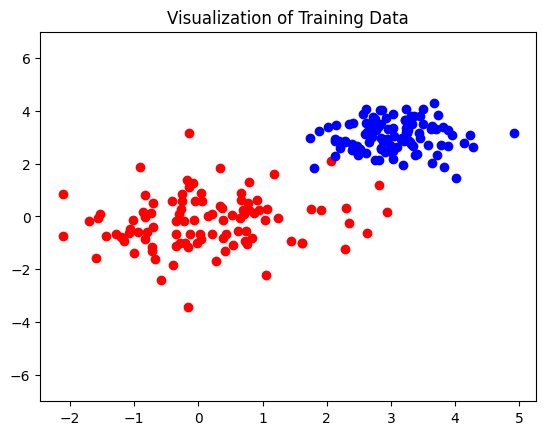

In [ ]:
size = 100
train_data = []
test_data = []
labels = [-1 for i in range(size)] # Clase negativa
labels += [1 for i in range(size)] # Clase positiva

# Queremos predecir puntos tomados de una distribución normal
mu = [[0,0], [3.0,3.0]]                  # Medias
std = [[[1,0],[0,1]],[[1/3,0], [0,1/3]]] # Matriz de covarianza

# Creamos el set de train
for i in range(len(mu)):
    train_data += list(np.random.multivariate_normal(mu[i],std[i],size))

train_data = np.array(train_data)
train_data = np.c_[ train_data, np.ones(2*size) ]

# Creamos el set de test
for i in range(len(mu)):
    test_data += list(np.random.multivariate_normal(mu[i],std[i],size))

test_data = np.array(test_data)
test_data = np.c_[ test_data, np.ones(2*size) ]

# Graficamos condiciones iniciales!
fig, ax = plt.subplots()
ax.set_ylim([-7, 7])
plt.title("Visualization of Training Data")
plt.scatter([x[0] for x in train_data[:size]],[x[1] for x in train_data[:size]],color="red")
plt.scatter([x[0] for x in train_data[size:]],[x[1] for x in train_data[size:]],color="blue")
plt.show()

Variable C o "parámetro de regularización" va a tener el siguiente impacto en nuestro modelo:

*   Si C es bajo, se toleran más los errores de clasificación. Esto permite que el margen sea más amplio, provocando que ciertos puntos sean mal clasificados. Esto le da más flexibilidad al modelo, lo que es útil cuando los datos tienen mucha superposición.
*   Si C es alto, se penalizan más los errores de clasificación. Lo que genera que el margen sea más estrecho. Esto genera un modelo más ajustado y con menor tolerancia a los errores, lo que puede llevar a un sobreajuste.

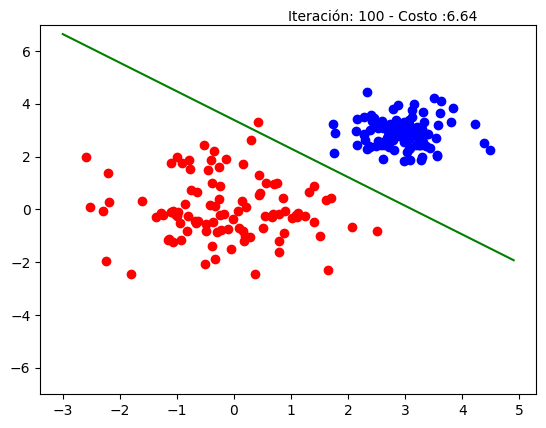

In [ ]:
# Instanciamos nuestro modelo con los datos generados
SVM_binary_classifier = BinaryClassifierSVM(C=1)

# Entrenamos el modelo..
SVM_binary_classifier.train(train_data, labels, iterations=100)

Training Accuracy: 99.5%
Test Accuracy: 99.0%


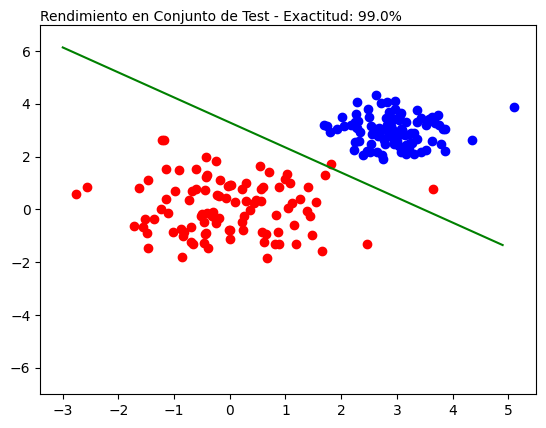

In [ ]:
# Accuracy para train y test.
train_accuracy = SVM_binary_classifier.accuracy(train_data, labels)
print(f"Training Accuracy: {train_accuracy}%")

test_accuracy = SVM_binary_classifier.accuracy(test_data, labels)
print(f"Test Accuracy: {test_accuracy}%")

# Visualización del hiperplano en el set de test
x_line = np.arange(-3,5,0.1)
line = [-(SVM_binary_classifier.params[-1] + x*SVM_binary_classifier.params[0])/SVM_binary_classifier.params[1] for x in x_line]
fig, ax = plt.subplots()
ax.text(0.0, 1.01, f"Rendimiento en Conjunto de Test - Exactitud: {test_accuracy}%", transform=ax.transAxes)
ax.set_ylim([-7, 7])
plt.scatter([x[0] for x in test_data[:size]],[x[1] for x in test_data[:size]],color="red")
plt.scatter([x[0] for x in test_data[size:]],[x[1] for x in test_data[size:]],color="blue")
plt.plot(x_line, line, color = "green")
plt.show()

## Datos No Lineales

Vamos a ver como solucionar problemas con datos no separables linealmente

25 25
25


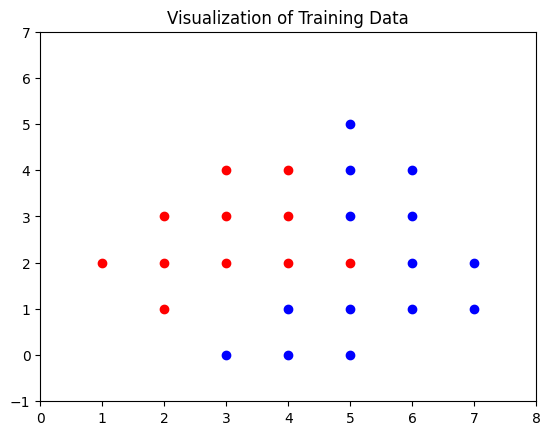

In [ ]:
import numpy as np

X = []
train_data = [[1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 3, 4, 4, 5, 5, 6, 6, 6, 6, 7, 7, 5, 5], [2, 2, 1, 3, 2, 3, 4, 2, 3, 4, 2, 3, 0, 0, 1, 1, 0, 1, 2, 3, 4, 1, 2, 4, 5]]
print(len(train_data[0]), len(train_data[1]))
for i in range(len(train_data[0])):
  X.append([train_data[0][i], train_data[1][i]])

y = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
print(len(y))

X = np.array(X)
X_1 = np.c_[X, np.ones(25)]

# Graficamos condiciones iniciales!
fig, ax = plt.subplots()
ax.set_ylim([-1, 7])
ax.set_xlim([0, 8])
plt.title("Visualization of Training Data")
plt.scatter([x[0] for x in X_1[:11]],[x[1] for x in X_1[:11]],color="red")
plt.scatter([x[0] for x in X_1[11:]],[x[1] for x in X_1[11:]],color="blue")
plt.show()

In [ ]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

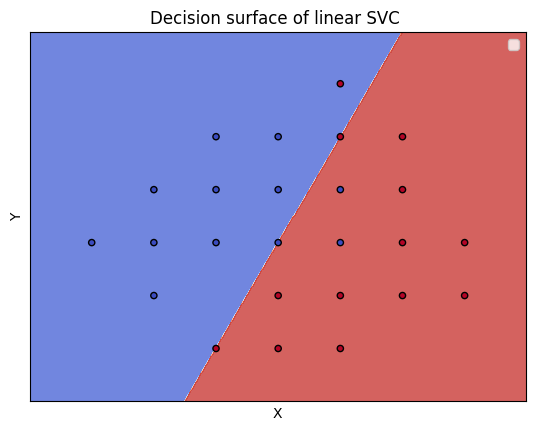

In [ ]:
model = svm.SVC(kernel='linear', C = 10)
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

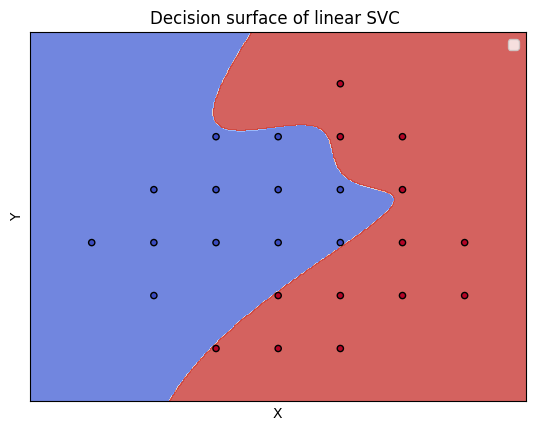

In [ ]:
model = svm.SVC(kernel='poly', degree = 7, C = 10)
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

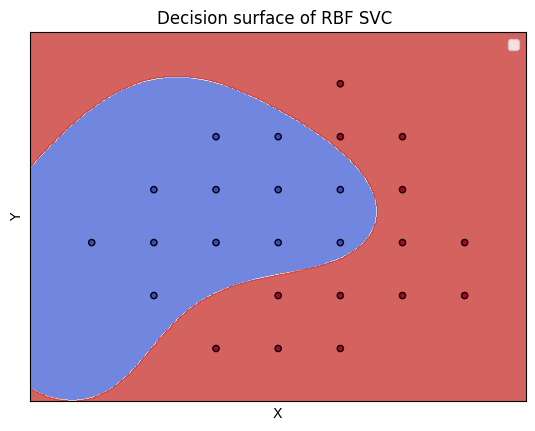

In [ ]:
model = svm.SVC(kernel='rbf', C = 10)
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of RBF SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()